# Question 1

## Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

data = np.genfromtxt('curve80.txt',delimiter = None)
X = data[:,0]
X = np.atleast_2d(X).T
Y = data[:,1]
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75)
print(Xtr.shape)
print(Xte.shape)
print(Ytr.shape)
print(Yte.shape)

(60, 1)
(20, 1)
(60,)
(20,)


## Problem 2

### part a

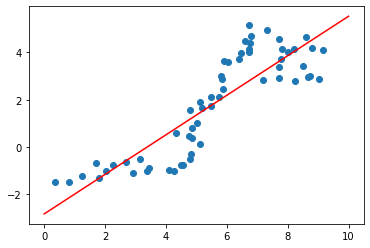

In [2]:
lr = ml.linear.linearRegress(Xtr,Ytr)
xs = np.linspace(0,10,200)
xs = xs[:,np.newaxis]
ys = lr.predict(xs)
plt.scatter(Xtr,Ytr)
plt.plot(xs,ys,'r')

### part b

[[-2.82765049  0.83606916]]


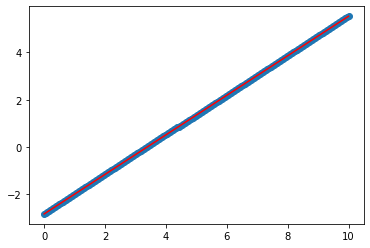

In [3]:
print(lr.theta)
def linear_func(x,coeff_list):
    sum = 0
    for i in range(len(coeff_list[0])):
        sum += coeff_list[0][i]*x**i
    return sum
y_pred = []
for i in xs:
    y_pred.append(linear_func(i,lr.theta))

plt.plot(xs,ys,'r')
plt.scatter(xs,y_pred)

### Part c

In [4]:
def MSE(Xtr,Ytr,model):
    MSE = 0
    for i in range(len(Xtr)):
        MSE = MSE + (Ytr[i]-model.predict(Xtr[i]))**2
    return MSE/len(Xtr)


MSE_train = MSE(Xtr,Ytr,lr)
print('MSE for Traing set is ',float(MSE_train),'\n')


MSE_test = MSE(Xte,Yte,lr)
print('MSE for Test set is ',float(MSE_test),'\n')



MSE for Traing set is  1.127711955609391 

MSE for Test set is  2.242349203010125 



## Problem 3

In [5]:
degree_list = [1,3,5,7,10,15,18]

### Part a & b

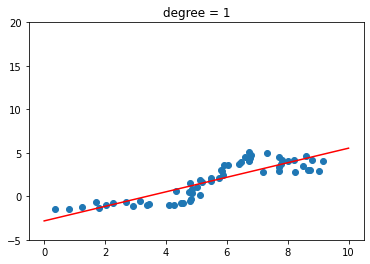

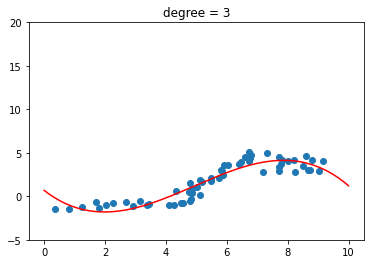

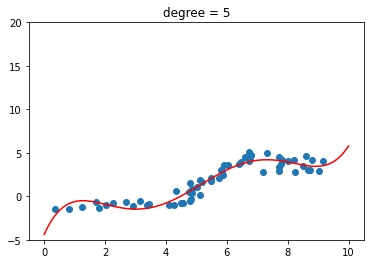

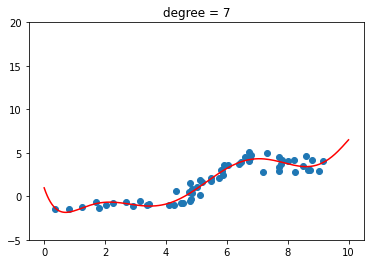

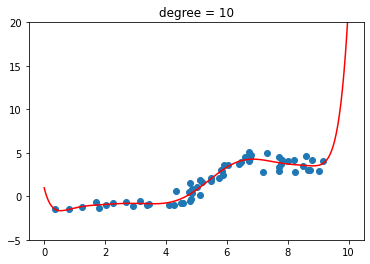

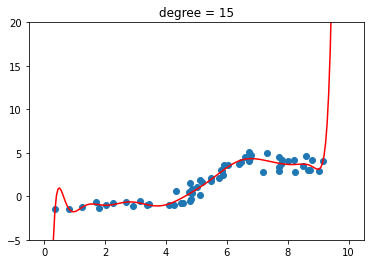

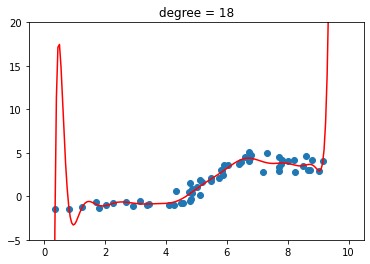

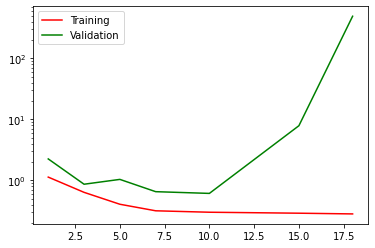

In [6]:
errTrain = []
errValidation = []
xs = np.linspace(0,10,200)
xs = xs[:,np.newaxis]
for degree in degree_list:
    XtrP = ml.transforms.fpoly(Xtr,degree,bias = False)
    XtrP,params = ml.transforms.rescale(XtrP)
    lr = ml.linear.linearRegress(XtrP,Ytr)
    XteP,_ = ml.transforms.rescale(ml.transforms.fpoly(Xte,degree,False),params)
    #xsp = ml.transforms.fpoly(xs,degree,bias = False)
    xsp,_ = ml.transforms.rescale(ml.transforms.fpoly(xs,degree,False),params)
    y_pred = lr.predict(xsp)
    plt.figure()
    plt.plot(xs,y_pred,'r')
    plt.ylim([-5,20])
    plt.scatter(Xtr,Ytr)
    name = 'degree = '+str(degree)
    plt.title(name)
    errTrain.append(lr.mse(XtrP,Ytr))
    errValidation.append(lr.mse(XteP,Yte))
plt.figure()
plt.semilogy(degree_list, errTrain, 'r-', label='Training')
plt.semilogy(degree_list, errValidation, 'g-',  label='Validation')
plt.legend()



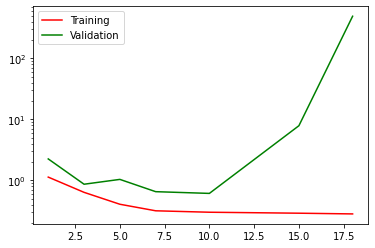

In [7]:
plt.figure()
plt.semilogy(degree_list, errTrain, 'r-', label='Training')
plt.semilogy(degree_list, errValidation, 'g-',  label='Validation')
plt.legend()

### part c

I would recommend use degree 10.

# problem 2

In [8]:
n_fold = 5
degree_list = [1,3,5,7,10,15,18]

In [9]:
def cross_vad(n_fold,degree,Xtr,Ytr):
    XtrP,_ = ml.transforms.rescale(ml.transforms.fpoly(Xtr,degree,False),params)
    lr = ml.linear.linearRegress(XtrP,Ytr)
    return lr.mse(Xtr,Ytr)

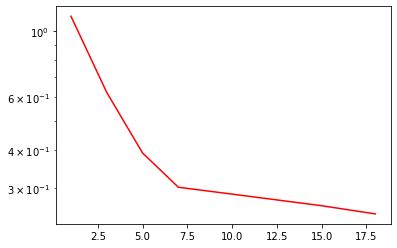

In [10]:
Error_list = []
for degree in degree_list:
    J = []
    for iFold in range(n_fold):
        Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,n_fold,iFold)
        XtiP = ml.transforms.fpoly(Xti,degree,bias = False)
        XtiP,params = ml.transforms.rescale(XtiP)
        lr = ml.linear.linearRegress(XtiP,Yti)
        J.append(lr.mse(XtiP,Yti))
    Error_list.append(sum(J)/len(J))
plt.figure()
plt.semilogy(degree_list, Error_list,'r-', label='Training')


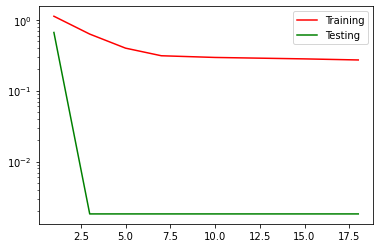

In [13]:
TrainError_list = []
TestError_list = []
for degree in degree_list:
    J = []
    K = []
    for iFold in range(n_fold):
        Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,n_fold,iFold)
        
        XtiP = ml.transforms.fpoly(Xti,degree,bias = False)
        XtiP,params = ml.transforms.rescale(XtiP)
        lr = ml.linear.linearRegress(XtiP,Yti)
        
        XviP = ml.transforms.fpoly(Xvi,degree,bias = False)
        XviP,params = ml.transforms.rescale(XviP)
        lr1 = ml.linear.linearRegress(XviP,Yvi)
        
        J.append(lr.mse(XtiP,Yti))
        K.append(lr1.mse(XviP,Yvi))
        
    TrainError_list.append(sum(J)/len(J))
    TestError_list.append(sum(K)/len(K))

plt.figure()
plt.semilogy(degree_list, TrainError_list,'r-', label='Training')
plt.semilogy(degree_list, TestError_list,'g-', label='Testing')
plt.legend()

### part 4

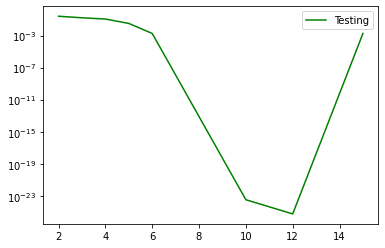

In [12]:
fold_list = [2,3,4,5,6,10,12,15]
TestError_list = []
degree = 10
for n_fold in fold_list:
    #J = []
    K = []
    for iFold in range(n_fold):
        Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,n_fold,iFold)
        
        #XtiP = ml.transforms.fpoly(Xti,degree,bias = False)
        #XtiP,params = ml.transforms.rescale(XtiP)
        #lr = ml.linear.linearRegress(XtiP,Yti)
        
        XviP = ml.transforms.fpoly(Xvi,degree,bias = False)
        XviP,params = ml.transforms.rescale(XviP)
        lr1 = ml.linear.linearRegress(XviP,Yvi)
        
        #J.append(lr.mse(XtiP,Yti))
        K.append(lr1.mse(XviP,Yvi))
        
    #TrainError_list.append(sum(J)/len(J))
    TestError_list.append(sum(K)/len(K))

plt.figure()
#plt.semilogy(degree_list, TrainError_list,'r-', label='Training')
plt.semilogy(fold_list, TestError_list,'g-', label='Testing')
plt.legend()

## Problem 3

I did all this homework by myself. Zhengran Ji.